In [25]:
# Punto 1

import pandas as pd

datos = pd.read_csv('bebidas.csv', index_col=0)
print(datos.head(), '\n\n', datos.tail())

   Edad  Temperatura  Bebida
0    17           13       0
1     4           15       0
2    44           11       1
3    37           14       0
4    37           25       1 

      Edad  Temperatura  Bebida
995    17           17       0
996    57           12       1
997    82            5       1
998    61            5       1
999    44            3       0


<AxesSubplot:xlabel='Edad', ylabel='Temperatura'>

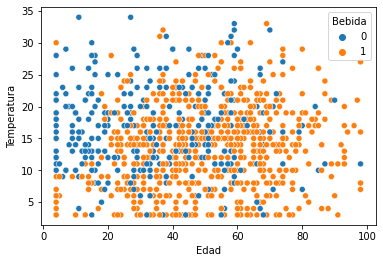

In [26]:
# Punto 2

import seaborn as sns 

sns.scatterplot(x=datos.Edad, y=datos.Temperatura, hue=datos.Bebida)

In [27]:
# Punto 3

# -- CATEGORIZACIÓN DE EDADES --
# 0 si la edad es menor que 18 años
# 1 si la edad es mayor o igual a 18 años, y menor que 60 años
# 2 si la edad es mayor o igual a 60 años

for i in range(len(datos)):
    if datos.Edad[i] < 18:
        datos.Edad[i] = 0
    elif (datos.Edad[i] >= 18) and (datos.Edad[i] < 60):
        datos.Edad[i] = 1
    else:
        datos.Edad[i] = 2

# -- CATEGORIZACIÓN DE TEMPERATURAS --
# 0 si la temperatura es menor o igual a 10°C (Frío)
# 1 si la temperatura es mayor a 10°C y menor a 20°C (Templado)
# 2 si la temperatura es mayor o igual a 20°C (Cálido)

for j in range(len(datos)):
    if datos.Temperatura[j] <= 10:
        datos.Temperatura[j] = 0
    elif (datos.Temperatura[j] > 10) and (datos.Temperatura[j] < 20):
        datos.Temperatura[j] = 1
    else:
        datos.Temperatura[j] = 2

print(datos.head(), '\n\n', datos.tail())

   Edad  Temperatura  Bebida
0     0            1       0
1     0            1       0
2     1            1       1
3     1            1       0
4     1            2       1 

      Edad  Temperatura  Bebida
995     0            1       0
996     1            1       1
997     2            0       1
998     2            0       1
999     1            0       0


In [39]:
# Punto 5

# Cálculo de la distribucion de Z 
# La distribución se almacena en una lista, donde [ P(Z=fría) , P(Z=caliente) ]
# Se esta representando fría con 0 y caliente con 1
# Inicio del conteo en cero

priori_z = [0,0]

for i in range(len(datos)):
    priori_z[datos.Bebida[i]] += 1

# Muestra el conteo de cuantas bebidas de cada tipo hay
print(f'Número de bebidas según su tipo: {priori_z}')

# Divide entre el número de clientes para obtener la distribución de probabilidad
for  j in range(0,2):
    priori_z[j] /= len(datos)

print(f'Distribución de probabilidad de Z: {priori_z}')


Número de bebidas según su tipo: [339, 661]
Distribución de probabilidad de Z: [0.339, 0.661]


In [73]:
# Punto 6

# Cálculo de la distribución conjunta de X y Y
# La distribución se almacena en una lista de listas (tamaño 3x3)
# El primer índice corresponde a la edad X (0 para menor de edad, 1 para adulto, 2 para adulto mayor)
# El segundo índice corresponde a la temperatura del día Y (0 para frío, 1 para templado, 2 para cálido)

evidencia_xy = [[0,0,0] , [0,0,0], [0,0,0]]

for i in range(0,len(datos)):
    evidencia_xy[datos.Edad[i]][datos.Temperatura[i]] += 1

# Muestra el conteo para cada pareja de valores edad-temperatura
print(f'Número de compras agrupadas según edad y temperatura: {evidencia_xy}')

# Divide entre el número de clientes para obtener la distribución de probabilidad
for i in range(3):
    for j in range(3):
        evidencia_xy[i][j] /= len(datos)

print(f'Distribución de probabiliad conjunta de X y Y: {evidencia_xy}')

Número de compras agrupadas según edad y temperatura: [[36, 50, 28], [178, 309, 126], [77, 133, 63]]
Distribución de probabiliad conjunta de X y Y: [[0.036, 0.05, 0.028], [0.178, 0.309, 0.126], [0.077, 0.133, 0.063]]


In [80]:
# Punto 7

# Cálculo de la distribución conjunta de X y Y y Z
# El primer índice corresponde a la edad X (0 para menor de edad, 1 para adulto, 2 para adulto mayor)
# El segundo índice corresponde a la temperatura del día Y (0 para frío, 1 para templado, 2 para cálido)
# El tercer índice corresponde a la bebida (0 para fría, 1 para caliente)

distribucionC_xyz = [[[0,0],[0,0],[0,0]] , [[0,0],[0,0],[0,0]], [[0,0],[0,0],[0,0]]]

for i in range(0,len(datos)):
    distribucionC_xyz[datos.Edad[i]][datos.Temperatura[i]][datos.Bebida[i]] += 1

# Muestra el conteo
print(distribucionC_xyz)

# Divide entre el número de clientes para obtener la distribución de probabilidad
for i in range(3):
    for j in range(3):
        for x in range(2):
            distribucionC_xyz[i][j][x] /= len(datos)

print(f'Distribución conjunta de X y Y y Z: {distribucionC_xyz}')

[[[16, 20], [47, 3], [27, 1]], [[43, 135], [110, 199], [61, 65]], [[8, 69], [14, 119], [13, 50]]]
Distribución conjunta de X y Y y Z: [[[0.016, 0.02], [0.047, 0.003], [0.027, 0.001]], [[0.043, 0.135], [0.11, 0.199], [0.061, 0.065]], [[0.008, 0.069], [0.014, 0.119], [0.013, 0.05]]]


In [82]:
# Punto 7 parte 2

# Cálculo de likelihood o verosimilitud
likelihood = [[[0,0],[0,0],[0,0]] , [[0,0],[0,0],[0,0]], [[0,0],[0,0],[0,0]]]

for i in range(3):
    for j in range(3):
        for x in range(2):
            likelihood[i][j][x] = distribucionC_xyz[i][j][x] / priori_z[x]

print(f'Likelihood o verosimilitud: {likelihood}')

Likelihood o verosimilitud: [[[0.0471976401179941, 0.030257186081694403], [0.13864306784660765, 0.0045385779122541605], [0.07964601769911504, 0.0015128593040847202]], [[0.12684365781710913, 0.2042360060514372], [0.3244837758112094, 0.3010590015128593], [0.1799410029498525, 0.09833585476550681]], [[0.02359882005899705, 0.1043872919818457], [0.04129793510324484, 0.18003025718608168], [0.0383480825958702, 0.07564296520423601]]]


In [92]:
# Código clasificador bayesiano

print('Nuevo cliente')
edad = input('Edad: ')
temperatura = input('Temperatura del día: ')

if edad == 'menor':
    edad_c = 0
elif edad == 'adulto':
    edad_c = 1
elif edad == 'mayor':
    edad_c = 2
else:
    print('Edad inválida')

if temperatura == 'frío' or temperatura == 'frio':
    temp_c = 0
elif temperatura == 'templado':
    temp_c = 1
elif temperatura == 'cálido' or 'calido':
    temp_c = 2
else:
    print('Temperatura inválida')

recomendacion_fria = (priori_z[0]*likelihood[edad_c][temp_c][0]) / evidencia_xy[edad_c][temp_c]
recomendacion_caliente = (priori_z[1]*likelihood[edad_c][temp_c][1]) / evidencia_xy[edad_c][temp_c]

if recomendacion_fria > recomendacion_caliente:
    print('La sugerencia es una bebida: fría')
else:
    print('La sugerencia es una bebida: caliente')

Nuevo cliente
La sugerencia es una bebida: fría


In [83]:
#Pruebas

prueba_distri = 0
for i in range(3):
    for j in range(3):
        for x in range(2):
            prueba_distri += distribucionC_xyz[i][j][x]

print(prueba_distri)

prueba_like = 0
for i in range(3):
    for j in range(3):
        for x in range(2):
            prueba_like += likelihood[i][j][x]

print(prueba_like)

0.9999999999999999
2.0


In [54]:
prueba = [ [[1,2,3] , [4,5,6], [7,8,9]] , [[10,11,12] , [13,14,15], [16,17,18]] ] 
prueba[0][0][0]

1

In [61]:
print(datos.Bebida[999])
print(datos.Edad[999])
print(datos.Temperatura[999])

0
1
0
